In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [3]:
import plotly.express as px

In [4]:
df = pd.read_csv('all_data_no_duplicates_no_nan.csv', index_col=0)

In [5]:
df.head()

,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,mfcc_a_9,...,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std,genre
song_id,,,,,,,,,,,,,,,,,,,,,
722ea18712329ff60ef72655711779208e1895de,-229.50793,165.34088,-7.086333,40.653236,21.612593,10.455354,2.519586,2.451797,-3.991856,-4.324726,...,1.371483,1.464422,107.666016,2.049022,6.809770,0.325403,1.186977,14.577969,8.571882,blues
6e9d44b49b4fdba2f1b7f2fd81c918f7bd832048,-152.97127,187.31133,-24.013628,36.722843,-7.629228,7.993011,0.122216,9.018068,-4.820596,15.190435,...,1.563161,1.532488,107.666016,1.219732,1.863686,-0.185727,-0.053225,14.237181,8.395347,blues
6cfc4b990168f33e9ebfd96feae0406b8a0625be,-108.80943,130.35703,-40.753914,57.989124,-32.169636,29.431482,-2.901658,10.708194,-5.848942,28.494379,...,1.383776,0.885813,114.843750,0.731147,0.105860,0.162505,-0.303242,14.258918,8.342572,blues
6d12adc4a57955aea80caa0f6b81b71c6301788e,-211.29941,188.12619,-9.946309,32.445030,20.394655,22.343174,-3.353201,12.316050,4.950298,5.162346,...,1.335705,1.347955,135.999178,2.226300,7.146918,-0.409219,0.747511,14.303135,8.386653,blues
6d80eb0c209e9be95ecbe6b2b880f26209eaee48,-137.08119,142.74070,-44.772590,55.344696,2.729026,31.821533,-3.522485,9.911481,2.599337,6.731053,...,1.542062,1.281024,132.512019,2.425881,8.324231,0.821095,2.731135,14.626939,8.361398,blues


In [6]:
X = df.drop('genre', axis=1)
y = df['genre']

In [7]:
X.head()

,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,mfcc_a_9,...,zcr_std,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std
song_id,,,,,,,,,,,,,,,,,,,,,
722ea18712329ff60ef72655711779208e1895de,-229.50793,165.34088,-7.086333,40.653236,21.612593,10.455354,2.519586,2.451797,-3.991856,-4.324726,...,0.025127,1.371483,1.464422,107.666016,2.049022,6.809770,0.325403,1.186977,14.577969,8.571882
6e9d44b49b4fdba2f1b7f2fd81c918f7bd832048,-152.97127,187.31133,-24.013628,36.722843,-7.629228,7.993011,0.122216,9.018068,-4.820596,15.190435,...,0.014338,1.563161,1.532488,107.666016,1.219732,1.863686,-0.185727,-0.053225,14.237181,8.395347
6cfc4b990168f33e9ebfd96feae0406b8a0625be,-108.80943,130.35703,-40.753914,57.989124,-32.169636,29.431482,-2.901658,10.708194,-5.848942,28.494379,...,0.026403,1.383776,0.885813,114.843750,0.731147,0.105860,0.162505,-0.303242,14.258918,8.342572
6d12adc4a57955aea80caa0f6b81b71c6301788e,-211.29941,188.12619,-9.946309,32.445030,20.394655,22.343174,-3.353201,12.316050,4.950298,5.162346,...,0.026476,1.335705,1.347955,135.999178,2.226300,7.146918,-0.409219,0.747511,14.303135,8.386653
6d80eb0c209e9be95ecbe6b2b880f26209eaee48,-137.08119,142.74070,-44.772590,55.344696,2.729026,31.821533,-3.522485,9.911481,2.599337,6.731053,...,0.046795,1.542062,1.281024,132.512019,2.425881,8.324231,0.821095,2.731135,14.626939,8.361398


In [8]:
len(X.columns)

79

<AxesSubplot:>

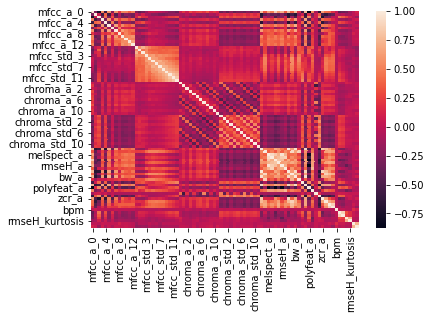

In [9]:
sns.heatmap(X.corr())

## Normalize Data

In [10]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=df.columns[:-1])
X_scaled

,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,mfcc_a_9,...,zcr_std,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std
0,0.720044,0.537168,0.415077,0.546522,0.608724,0.471041,0.539956,0.456838,0.431799,0.421460,...,0.253171,0.380552,0.279490,0.335106,0.202542,0.048464,0.325090,0.067533,0.863221,0.958151
1,0.840586,0.672186,0.329867,0.517902,0.345097,0.439374,0.501134,0.552778,0.417084,0.762468,...,0.136607,0.470546,0.296617,0.335106,0.115681,0.018041,0.244969,0.038175,0.811358,0.906720
2,0.910139,0.322177,0.245597,0.672756,0.123856,0.715080,0.452168,0.577473,0.398824,0.994941,...,0.266957,0.386323,0.133901,0.397163,0.064506,0.007228,0.299555,0.032257,0.814666,0.891345
3,0.748721,0.677194,0.400680,0.486753,0.597743,0.623922,0.444856,0.600965,0.590582,0.587237,...,0.267752,0.363754,0.250185,0.580067,0.221111,0.050538,0.209935,0.057130,0.821395,0.904187
4,0.865612,0.398280,0.225368,0.653500,0.438481,0.745817,0.442115,0.565832,0.548837,0.614649,...,0.487287,0.460640,0.233344,0.549918,0.242015,0.057780,0.402792,0.104086,0.870673,0.896829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,0.845170,0.471760,0.292178,0.548169,0.343411,0.446872,0.349108,0.472735,0.575003,0.442142,...,0.327811,0.397045,0.244111,0.494032,0.120447,0.025014,0.219255,0.016083,0.891956,0.972532
1600,0.959026,0.427918,0.245175,0.674763,0.233731,0.698102,0.226161,0.645511,0.534028,0.587915,...,0.335161,0.356047,0.098244,0.611846,0.130112,0.016002,0.405798,0.085387,0.857710,0.908565
1601,0.820316,0.454198,0.265698,0.514534,0.484009,0.589142,0.653663,0.578821,0.598097,0.852855,...,0.360383,0.547018,0.318101,0.468085,0.096746,0.006469,0.388765,0.046689,0.867620,0.962343
1602,0.893790,0.481285,0.213695,0.642469,0.369842,0.658340,0.571908,0.455085,0.678719,0.485011,...,0.182409,0.367758,0.080302,0.494032,0.220626,0.048391,0.528456,0.147247,0.848958,0.941151


In [11]:
y

song_id
722ea18712329ff60ef72655711779208e1895de          blues
6e9d44b49b4fdba2f1b7f2fd81c918f7bd832048          blues
6cfc4b990168f33e9ebfd96feae0406b8a0625be          blues
6d12adc4a57955aea80caa0f6b81b71c6301788e          blues
6d80eb0c209e9be95ecbe6b2b880f26209eaee48          blues
                                               ...     
74407e4a536923a0eefcb36e7f9a7d44f837a539    alternative
5ed4f494ce3bb92a97cac805ba57e9cc1a44ccf7    alternative
33d70c1587b645ab1490c24cbca603cfd1d8262a    alternative
fc6b1cf5324f8272b95c32aa7a5951764de9a935    alternative
4cb29d7252c413497ee6c85d87a918f197b02951    alternative
Name: genre, Length: 1604, dtype: object

## PCA - Dimension Reduction

In [12]:
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15'])

<BarContainer object of 15 artists>

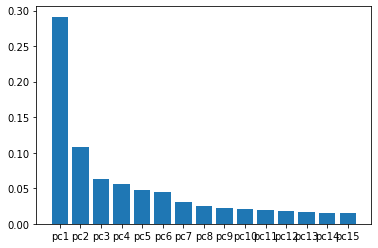

In [13]:
plt.bar(principalDf.columns, pca.explained_variance_ratio_)

In [14]:
sum(pca.explained_variance_ratio_[0:12])

0.7472038264793851

The first 12 PCs account for 75% of the variance. 

In [15]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12'])

In [16]:
principalDf['genre'] = df['genre'].values
principalDf.index = df.index
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,genre
song_id,,,,,,,,,,,,,
722ea18712329ff60ef72655711779208e1895de,0.359589,0.413387,-0.246847,0.304729,0.145535,-0.288975,-0.034752,0.026084,-0.284671,0.072494,-0.051718,0.130854,blues
6e9d44b49b4fdba2f1b7f2fd81c918f7bd832048,-0.112710,0.001522,-0.167043,-0.586560,0.068245,-0.077406,0.126346,-0.093072,-0.425127,-0.175201,-0.006128,0.074395,blues
6cfc4b990168f33e9ebfd96feae0406b8a0625be,-0.404665,-0.684186,0.236718,-0.165832,-0.140347,-0.143949,-0.049195,0.202096,-0.046631,-0.171218,0.206423,0.042900,blues
6d12adc4a57955aea80caa0f6b81b71c6301788e,0.346818,0.092084,-0.233876,-0.327278,0.628163,-0.460617,-0.232163,-0.087981,-0.193850,-0.000048,-0.133381,0.067349,blues
6d80eb0c209e9be95ecbe6b2b880f26209eaee48,-0.336195,-0.209363,0.121101,-0.302258,0.289293,-0.382317,-0.313716,-0.225309,0.033200,-0.097188,-0.126938,0.087673,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74407e4a536923a0eefcb36e7f9a7d44f837a539,-0.314121,0.592355,-0.319158,-0.334227,-0.224401,-0.228174,0.552335,0.228787,-0.213569,-0.019167,-0.070287,0.341135,alternative
5ed4f494ce3bb92a97cac805ba57e9cc1a44ccf7,-0.837088,-0.635478,-0.313794,0.230355,0.129574,-0.441247,0.070953,-0.100686,0.305987,0.164463,-0.330678,-0.120537,alternative
33d70c1587b645ab1490c24cbca603cfd1d8262a,-0.699344,0.240221,-0.436098,-0.065327,0.063916,0.046406,0.140024,-0.491424,0.099092,0.023255,0.225156,0.021490,alternative


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

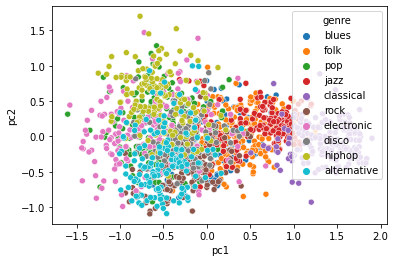

In [17]:
# 2 dimensions
sns.scatterplot(data=principalDf, x='pc1', y='pc2', hue='genre')

In [18]:
# 3 dimensions
fig = px.scatter_3d(principalDf, x='pc1', y='pc2', z='pc3', color='genre')
fig.write_html("pca_scatter3d.html")
# view the plot in safari

## Add Encoded Label

In [19]:
le = LabelEncoder()
principalDf['multiclass_label'] = le.fit_transform(principalDf['genre'])

In [20]:
encoded_classes = {}
for i, idx in zip(range(len(le.classes_)), list(le.classes_)):
    encoded_classes[idx] = i    
encoded_classes

{'alternative': 0,
 'blues': 1,
 'classical': 2,
 'disco': 3,
 'electronic': 4,
 'folk': 5,
 'hiphop': 6,
 'jazz': 7,
 'pop': 8,
 'rock': 9}

In [21]:
principalDf.groupby('genre')['multiclass_label'].value_counts()

genre        multiclass_label
alternative  0                   144
blues        1                   125
classical    2                   166
disco        3                   118
electronic   4                   174
folk         5                   223
hiphop       6                   153
jazz         7                   188
pop          8                   173
rock         9                   140
Name: multiclass_label, dtype: int64

In [22]:
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,genre,multiclass_label
song_id,,,,,,,,,,,,,,
722ea18712329ff60ef72655711779208e1895de,0.359589,0.413387,-0.246847,0.304729,0.145535,-0.288975,-0.034752,0.026084,-0.284671,0.072494,-0.051718,0.130854,blues,1
6e9d44b49b4fdba2f1b7f2fd81c918f7bd832048,-0.112710,0.001522,-0.167043,-0.586560,0.068245,-0.077406,0.126346,-0.093072,-0.425127,-0.175201,-0.006128,0.074395,blues,1
6cfc4b990168f33e9ebfd96feae0406b8a0625be,-0.404665,-0.684186,0.236718,-0.165832,-0.140347,-0.143949,-0.049195,0.202096,-0.046631,-0.171218,0.206423,0.042900,blues,1
6d12adc4a57955aea80caa0f6b81b71c6301788e,0.346818,0.092084,-0.233876,-0.327278,0.628163,-0.460617,-0.232163,-0.087981,-0.193850,-0.000048,-0.133381,0.067349,blues,1
6d80eb0c209e9be95ecbe6b2b880f26209eaee48,-0.336195,-0.209363,0.121101,-0.302258,0.289293,-0.382317,-0.313716,-0.225309,0.033200,-0.097188,-0.126938,0.087673,blues,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74407e4a536923a0eefcb36e7f9a7d44f837a539,-0.314121,0.592355,-0.319158,-0.334227,-0.224401,-0.228174,0.552335,0.228787,-0.213569,-0.019167,-0.070287,0.341135,alternative,0
5ed4f494ce3bb92a97cac805ba57e9cc1a44ccf7,-0.837088,-0.635478,-0.313794,0.230355,0.129574,-0.441247,0.070953,-0.100686,0.305987,0.164463,-0.330678,-0.120537,alternative,0
33d70c1587b645ab1490c24cbca603cfd1d8262a,-0.699344,0.240221,-0.436098,-0.065327,0.063916,0.046406,0.140024,-0.491424,0.099092,0.023255,0.225156,0.021490,alternative,0


In [24]:
principalDf.to_csv('preprocessed_PC_data.csv', index=True)